# Kazakh Layouts Development

I decided to develop a Kazakh layout with the same method used for Russian.

In [1]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

Text source: [qazcorpora.kz](https://qazcorpora.kz/).

## Position Penalties

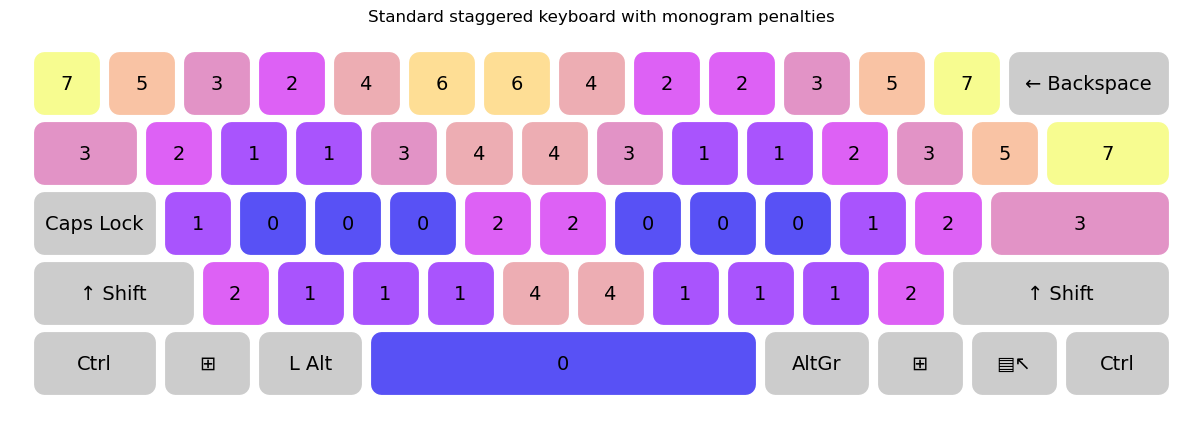

In [2]:
_ = STANDARD_KBD.display()

In [3]:
KZ_LETTERS = {
#     'vh': 'аоыұия',
#     'vs': 'әеөіү',
#     'vf': 'эю',
    'v': 'аоыұияәеёөіүэю',
    'c': 'бвгғджзкқлмнңпрстуфхһцчшщъьй'
}
KZ = Corpus.from_path('kazak.txt', types=KZ_LETTERS)

In [4]:
# Analyzing Where Keys Gravitate to

## Inner (index finger) or outer (pinky)


In [5]:
KZ.bigrams

,bigram,num,l1,l2,t1,t2,freq
0,¶қ,92,¶,қ,-,c,0.000280
1,қа,2942,қ,а,c,v,0.008967
2,аз,1341,а,з,v,c,0.004087
3,за,943,з,а,c,v,0.002874
4,ақ,1888,а,қ,v,c,0.005754
...,...,...,...,...,...,...,...
1860,чы,1,ч,ы,c,v,0.000003
1861,тᾱ,1,т,ᾱ,c,-,0.000003
1862,ᾱн,1,ᾱ,н,-,c,0.000003
1863,63,1,6,3,-,-,0.000003


,freq_out,freq_in,outer,frequency,outerness
ү,0.121915,0.000000,-0.121915,0.121915,-10000.000000
и,35.385877,1.462982,-33.922895,36.848859,-9205.955335
а,9.356989,3.657455,-5.699534,13.014444,-4379.391101
ұ,0.457182,0.304788,-0.152394,0.761970,-2000.000000
о,4.724213,5.547140,0.822927,10.271353,801.186944
е,6.400546,14.081202,7.680655,20.481748,3750.000000
ы,0.396224,1.889685,1.493461,2.285909,6533.333333
і,0.335267,3.139316,2.804049,3.474582,8070.175439
ю,0.091436,0.883885,0.792449,0.975321,8125.000000
я,0.091436,23.864894,23.773457,23.956330,9923.664122


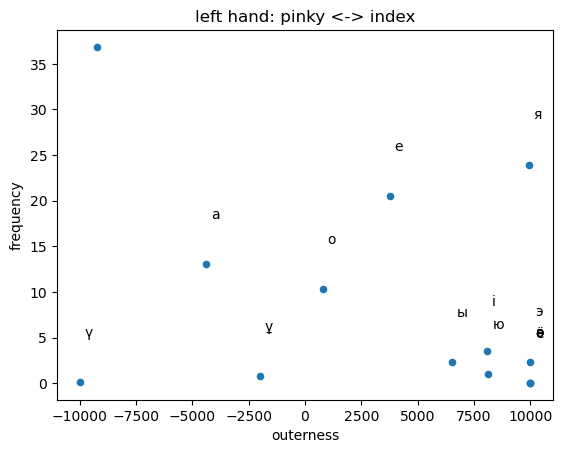

In [6]:
KZ.display_outerness("(t1 == 'v') & (t2 == 'v')", True)

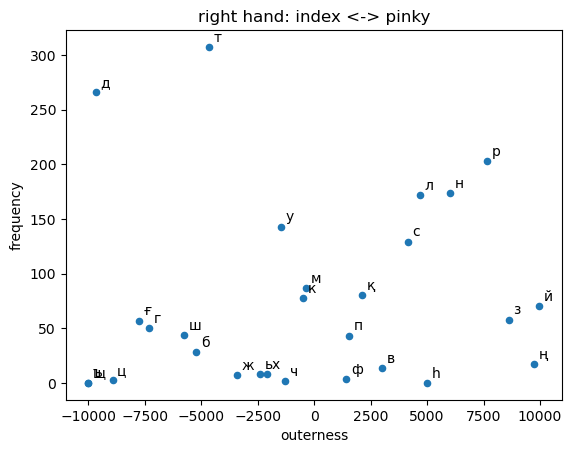

In [7]:
_ = KZ.display_outerness("(t1 == 'c') & (t2 == 'c')")

In [8]:
layouts = {
    'default': r'''
    
`12345 67890-=
→йцуке нгщшзхъ\
 фывап ролджэ¶
 ячсми тьбю.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',

    'тест1': r'''
`12345 67890-=
→уеэюя нгцшзчф\
 ыаоий рлмсдж¶
 ъьхщв кптб.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',

    'тест2': r'''
`12345 67890-=
→уеэюя шнбцзчф\
 ыаоий грлмсж¶
 ъьхщв дкпт.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅∅үё ∅ң∅∅∅∅∅|
 ∅ә∅і∅ ғ∅ө∅∅∅∅
 ∅∅һ∅∅ ∅қ∅∅/
∅
''',

    'тест3': r'''
ё12345 67890-=
→июяйв цдбнзчф\
 оеаы, грлмсж¶
 ъьхщэ шткпу
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅ү∅ұ∅ ∅∅∅ң∅∅∅|
 ө∅әі∅ ғ∅∅∅∅∅∅
 ∅∅һ∅∅ ∅∅қ∅∅
∅
''',
    
  'тест4': r'''
ё12345 67890-=
→юивяч бгмзжхъ\
 уеаыо ,днлрй¶
 цьщэф штксп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ү∅∅∅∅ ∅ғң∅∅һ∅|
 ұ∅әіө ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅қ∅∅
∅
''',
    

  'тест5': r'''
ё12345 67890-=
→цьовч бгмзжхъ\
 еауыю ,днлрй¶
 щэияф штксп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ө∅∅∅∅ ∅ғң∅∅һ∅|
 ∅әұіү ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅қ∅∅
∅
''',

  'тест6': r'''
ю12345 67890-=
→хоивя бгмжшзң\
 еауы, дғнлрй¶
 әұүіө птқкс
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ ∅∅∅∅∅|
 э∅∅∅` ∅∅∅∅ь∅
 ∅ъ∅∅ё щч∅ц∅
∅
''',

    
  'тест7': r'''
ю12345 67890-=
→хиовя шбгмжзң\
 іыеа, ғднлрй¶
 әуұөү кқтсп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅∅∅∅∅|
 ∅∅э∅` ∅∅∅∅ь∅∅
 ∅∅ъё∅ ∅∅чц∅
∅
''',
    

  'тест8': r'''
ю12345 67890-=
→хиовя шгмбзңж\
 уыеа, ғднлрй¶
 әіұөү кқтсп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅∅∅∅∅|
 ∅∅э∅` ∅∅∅∅∅ь∅
 ∅∅ъё∅ ∅∅чц∅
∅
''',
}


In [9]:
# these keys MUST be in any layout, otherwise the code throws an exception and halts
KZ_BASE = set('`-!?%*():;.,⌴¶')
for v in KZ_LETTERS.values():
    KZ_BASE |= set(v)

res = {}
for k, l in layouts.items():
    print(k, end=': ')
    res[k] = r = Result(KZ, Layout(k, l, base_keys=KZ_BASE))
    print(r.score)

default: key "/" repeated: 2
2.585910341329973
тест1: key "/" repeated: 2
1.7048656042047672
тест2: key "/" repeated: 2
1.4440102045520908
тест3: 1.1237470992331218
тест4: 0.9694385959519894
тест5: 0.98075120256958
тест6: 1.2085770489787764
тест7: 1.1457683382255759
тест8: 1.1142402680231753


# Standings

In [10]:
comments = {
    'default': 'ЙЦУКЕН',
    'тест1': 'simple dvorak-like improvement',
    'тест2': 'simple dvorak-like improvement',
    'тест5': '',
    'тест7': 'All Kazakh letters on top layer'
}
print(pd.DataFrame([(k, v.score.round(3), comments[k]) for k, v in res.items() if k in comments],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False))

| layout   |   score | comment                         |
|:---------|--------:|:--------------------------------|
| тест5    |   0.981 |                                 |
| тест7    |   1.146 | All Kazakh letters on top layer |
| тест2    |   1.444 | simple dvorak-like improvement  |
| тест1    |   1.705 | simple dvorak-like improvement  |
| default  |   2.586 | ЙЦУКЕН                          |


Dvorak layout is still the best, if we weigh bigrams seriously. Colemak was a mix of both, and scores slightly worse, but not as badly as I expected.
    

## Heatmap

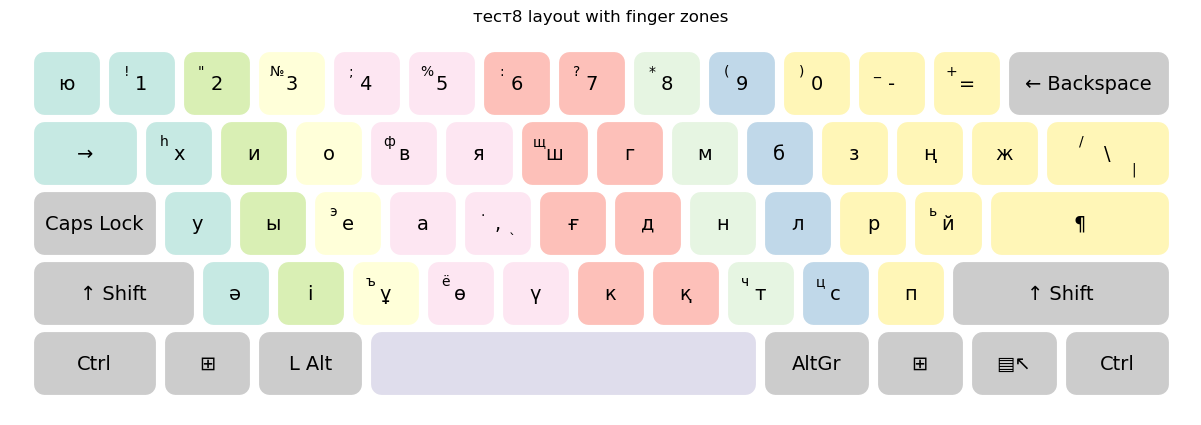

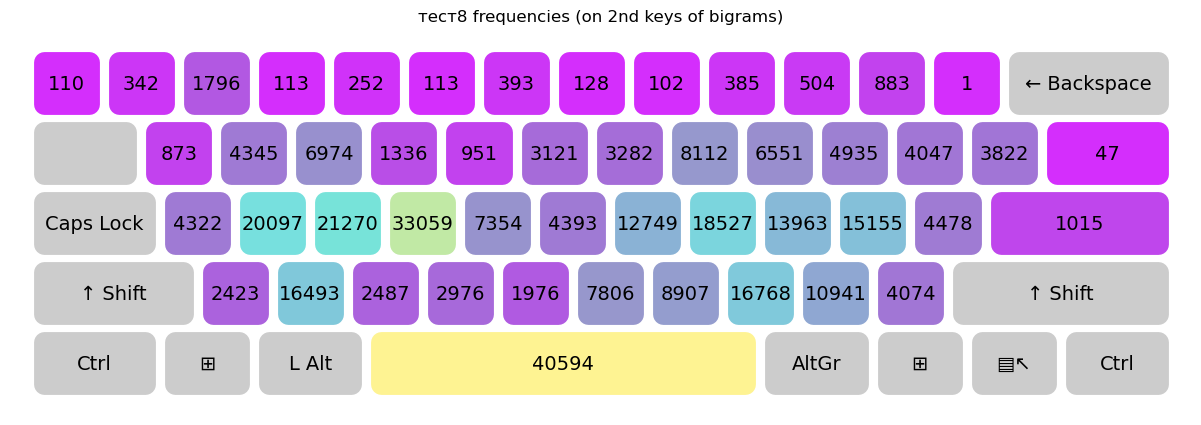

In [11]:
res['тест8'].layout.display('finger')
res['тест8'].display('freq')

## Arrow Maps

The less arrows, the better.

Look at the arrow maps: almost all arrows are thin, and there are few of them. QWERTY has lots of thick arrows. Colemak has noteably more than Dvorak, but the score is quite ok.

I expected Colemak to have a lot of costs on the left hand, but it has more on the right.

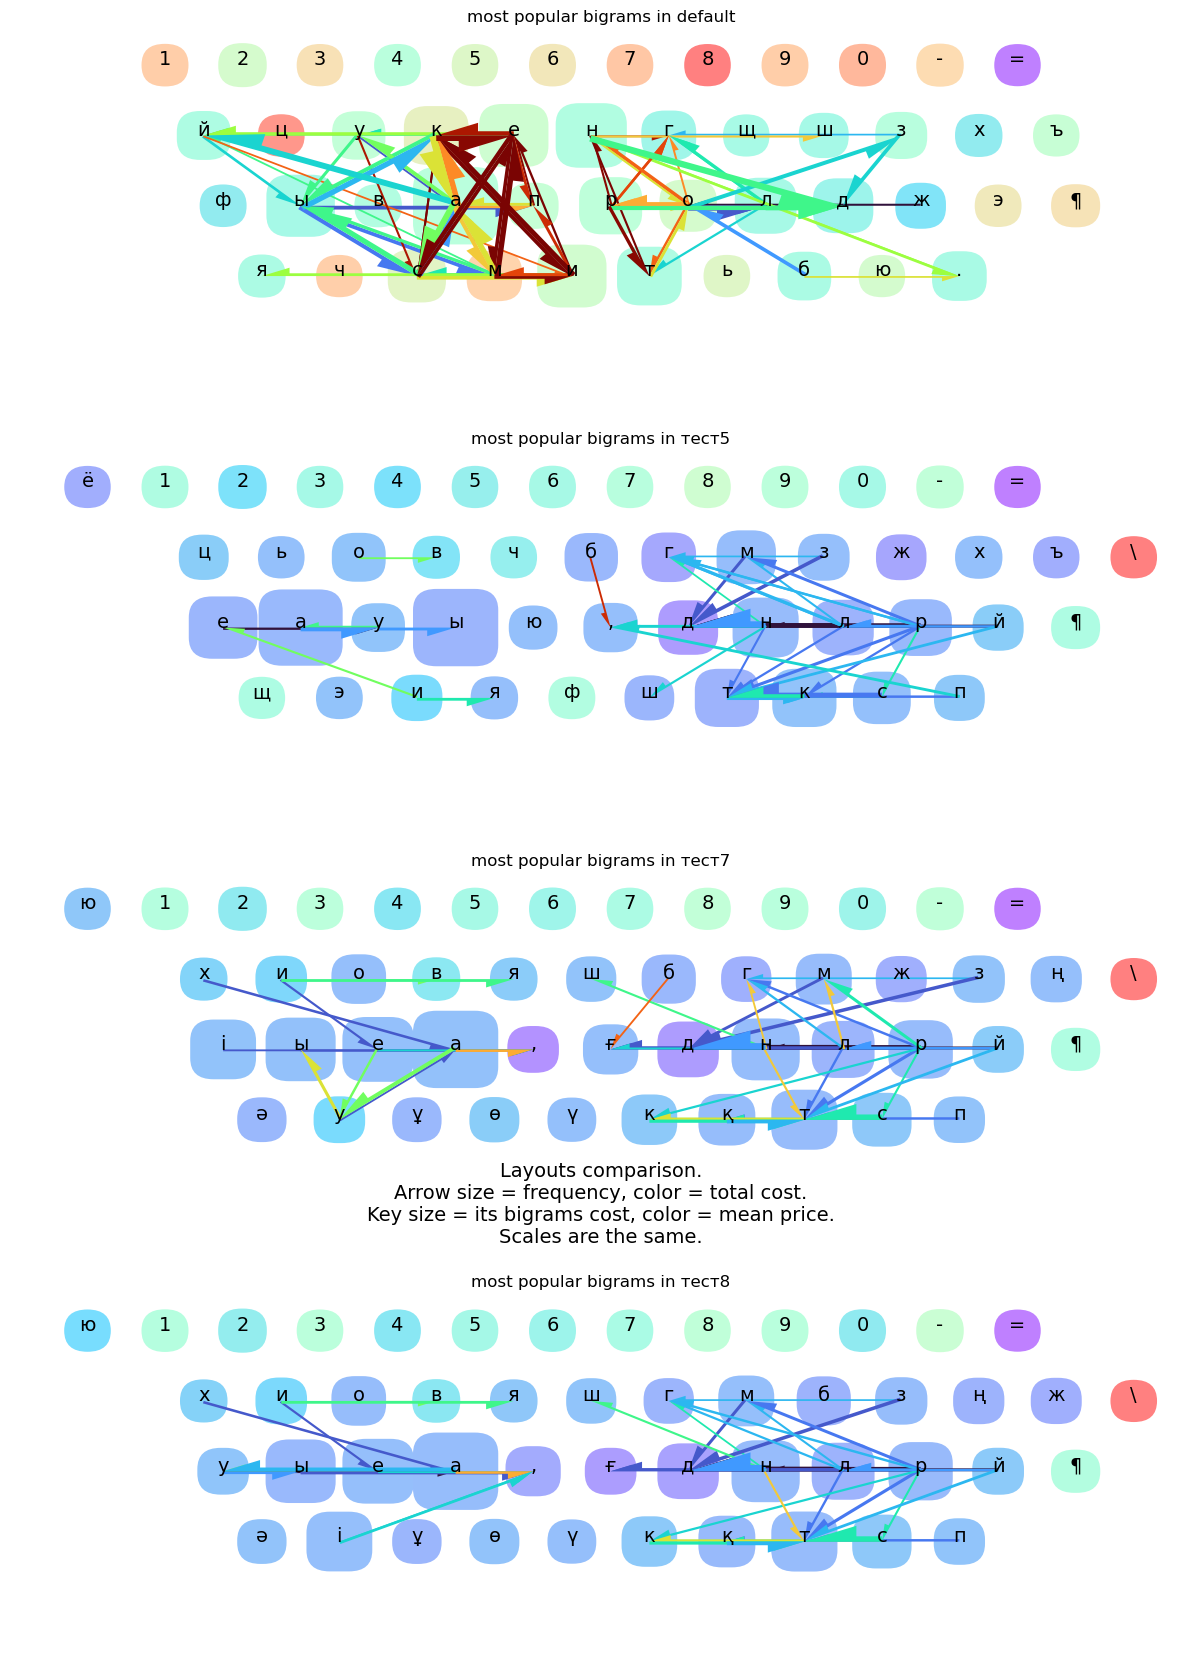

In [12]:
res['default'].combomap(res['тест5'], res['тест7'], res['тест8'])

<AxesSubplot: xlabel='finger'>

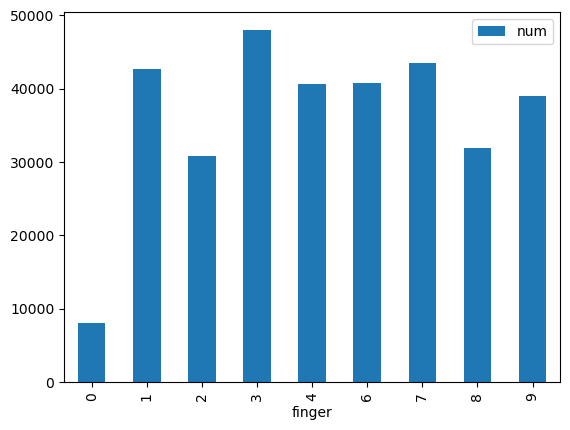

In [13]:
res['тест8'].bigrams.groupby('finger').agg({'num': 'sum'}).plot.bar()

# Gravitation to Rows

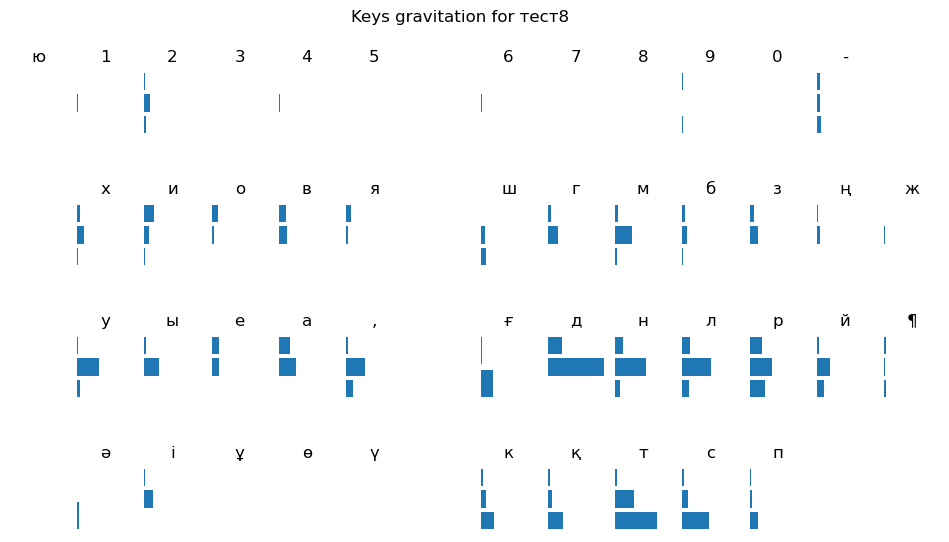

In [14]:
res['тест8'].display('rows')

In [15]:
res['тест8'].layout.export()


default partial alphanumeric_keys
xkb_symbols "тест8" {
	include "ru(common)"
	name[Group1]= "Culebron (тест8)";
	
	key <TLDE> { [ Cyrillic_yu, Cyrillic_YU ] };
	key <AE01> { [ 1, exclam ] };
	key <AE02> { [ 2, quotedbl ] };
	key <AE03> { [ 3, numerosign ] };
	key <AE04> { [ 4, semicolon ] };
	key <AE05> { [ 5, percent ] };
	key <AE06> { [ 6, colon ] };
	key <AE07> { [ 7, question ] };
	key <AE08> { [ 8, asterisk ] };
	key <AE09> { [ 9, parenleft ] };
	key <AE10> { [ 0, parenright ] };
	key <AE11> { [ minus, underscore ] };
	key <AE12> { [ equal, plus ] };


	key <AD01> { [ Cyrillic_ha, Cyrillic_HA, Cyrillic_shha, Cyrillic_SHHA ] };
	key <AD02> { [ Cyrillic_i, Cyrillic_I ] };
	key <AD03> { [ Cyrillic_o, Cyrillic_O ] };
	key <AD04> { [ Cyrillic_ve, Cyrillic_VE, Cyrillic_ef, Cyrillic_EF ] };
	key <AD05> { [ Cyrillic_ya, Cyrillic_YA ] };
	key <AD06> { [ Cyrillic_sha, Cyrillic_SHA, Cyrillic_shcha, Cyrillic_SHCHA ] };
	key <AD07> { [ Cyrillic_ghe, Cyrillic_GHE ] };
	key <AD08> { [ Cyrillic